In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('daily-total-female-births-CA.csv', parse_dates=[0])

In [3]:
df.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [4]:
df['date'].dtype

dtype('<M8[ns]')

In [5]:
feature = df.copy()

In [6]:
feature['Years'] = df['date'].dt.year

In [7]:
feature['Months'] = df['date'].dt.month

In [8]:
feature['Days'] = df['date'].dt.day

In [9]:
feature.head()

,date,births,Years,Months,Days
0,1959-01-01,35,1959,1,1
1,1959-01-02,32,1959,1,2
2,1959-01-03,30,1959,1,3
3,1959-01-04,31,1959,1,4
4,1959-01-05,44,1959,1,5


In [10]:
feature['Lag1'] = df['births'].shift(1)


In [11]:
feature['Lag2'] = df['births'].shift(365)

In [12]:
feature['Roll_mean'] = df['births'].rolling(window=2).mean()
feature['Roll_max'] = df['births'].rolling(window=3).max()

In [13]:
feature["Expand_max"] = df['births'].expanding().max()

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
Dataviz_df = df.copy()

In [16]:
Dataviz_df.head(10)

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29
6,1959-01-07,45
7,1959-01-08,43
8,1959-01-09,38
9,1959-01-10,27


<AxesSubplot: >

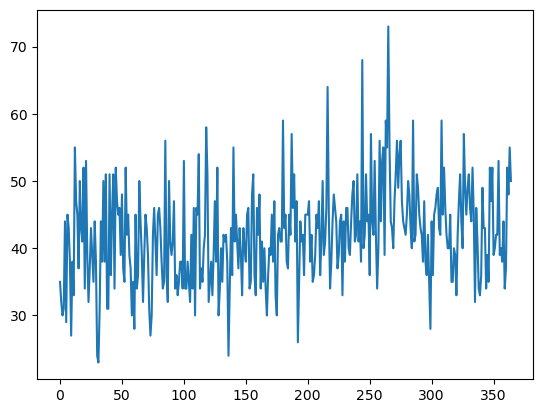

In [17]:
Dataviz_df['births'].plot()

In [18]:
Dataviz_df.index = Dataviz_df['date']

<AxesSubplot: xlabel='date'>

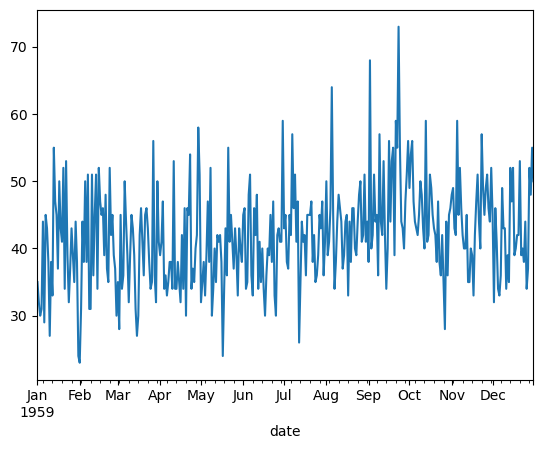

In [19]:
Dataviz_df['births'].plot()

In [20]:
Dataviz_df2 = Dataviz_df[(Dataviz_df['date'] > '1959-01-01') & (Dataviz_df['date']<= '1959-01-10')].copy()

In [21]:
Dataviz_df2

,date,births
date,,
1959-01-02,1959-01-02,32
1959-01-03,1959-01-03,30
1959-01-04,1959-01-04,31
1959-01-05,1959-01-05,44
1959-01-06,1959-01-06,29
1959-01-07,1959-01-07,45
1959-01-08,1959-01-08,43
1959-01-09,1959-01-09,38
1959-01-10,1959-01-10,27


<AxesSubplot: xlabel='date'>

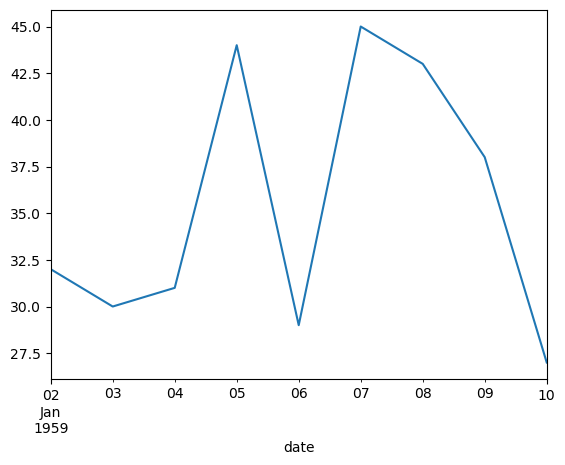

In [22]:
Dataviz_df2['births'].plot()

In [23]:
import seaborn as sns

<AxesSubplot: ylabel='births'>

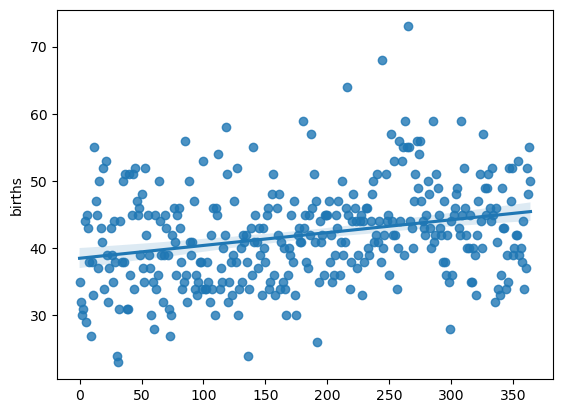

In [24]:
sns.regplot(x= df.index.values, y=df['births'])

<AxesSubplot: ylabel='births'>

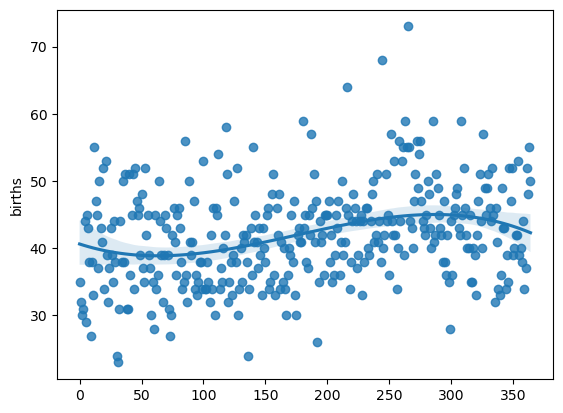

In [25]:
sns.regplot(x= df.index.values, y=df['births'], order=3)